In [2]:
import torch
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import heapq
import random
import matplotlib.pyplot as plt
import os

# traverse directory and find files

In [35]:
def traverse_and_get_files(directory, file_type="", file_prefix=""):
    fileList = []
    for root, subDirs, files in os.walk(directory):
        for file_name in files:
            if file_name.endswith(file_type) and file_name.startswith(file_prefix):
                fileList.append(os.path.join(root, file_name))
    return fileList

# generate dataframe of statisticals for given recorded data

In [134]:
def get_statis_df(dir, save_path=None, keys=[], file_type="", file_prefix=""):
    fileList = traverse_and_get_files(dir, file_type=file_type, file_prefix=file_prefix)
    data = pd.DataFrame(columns=keys)
    for ifile in fileList:
        cur_results = torch.load(ifile)
        tmp={}
        for ikey in keys:
            tmp[ikey] = cur_results[ikey]
        data = data.append([tmp], ignore_index=True)
    
    if save_path is not None:
        print("Saving csv into {}".format(save_path))
        data.to_csv(save_path)
    return data



In [62]:
keys=[
      "env",
      "dataset", 
      "prefix",
      "observable_type",
      "observable_ratio",
      "suffix", 
      "mean_score", 
      "mean_reward", 
      "mean_action_diffs", 
      "mean_observation_diffs",
      
      
]
dir = "/home/pengjie/DifRL/libs/diffuser/logs/results/"
save_path = "/home/pengjie/DifRL/libs/diffuser/logs/csvs/test.csv"
data = get_statis_df(dir, save_path=save_path, keys=keys, file_type="pt", file_prefix="result")

Saving csv into /home/pengjie/DifRL/libs/diffuser/logs/csvs/test.csv


In [ ]:
cur_data = data.loc[data["Method"].isin(unsupervised_list)]
cur_data = data.loc[(data["Domain"] == domain_name)&(data["Task"] == task_name)]

# Data Selection

In [148]:
def select_data(data, conditions, coloums=None):
    for k,v in conditions.items():
        if isinstance(v,list):
            data = data.loc[data[k].isin(v)]
        else:
            data = data.loc[data[k] == v]
    if coloums is not None:
        return data.loc[:, coloums]
    else:
        return data
    
def order_data(data, ordered_coloum, orders):
    cur_data = []
    for i_name in orders:
            cur_data.append(data.loc[data[ordered_coloum]== i_name] )
    return pd.concat(cur_data)

In [66]:
data

,env,dataset,prefix,observable_type,observable_ratio,suffix,mean_score,mean_reward,mean_action_diffs,mean_observation_diffs
0,halfcheetah,halfcheetah-medium-expert-v2,oracle_add_noise_1,random_step,0.1,random_step0.1,0.045597,285.918985,0.566249,2.601232
1,halfcheetah,halfcheetah-medium-expert-v2,oracle_add_noise_1,random_episode,0.9,random_episode0.9,0.390361,4566.224674,0.185006,1.111503
2,halfcheetah,halfcheetah-medium-expert-v2,oracle_add_noise_1,full,0.9,full,1.149834,13995.218535,0.000000,0.000000
3,halfcheetah,halfcheetah-medium-expert-v2,oracle_add_noise_1,random_episode,0.5,random_episode0.5,0.078423,693.462216,0.495321,2.443877
4,halfcheetah,halfcheetah-medium-expert-v2,oracle_add_noise_1,random_step,0.5,random_step0.5,0.081037,725.906736,0.465227,1.460037
...,...,...,...,...,...,...,...,...,...,...
112,halfcheetah,halfcheetah-medium-expert-v2,oracle_repaint_noise,random_step,0.7,random_step0.7,0.025368,34.771844,0.564528,1.375211
113,halfcheetah,halfcheetah-medium-expert-v2,oracle_repaint_noise,random_episode,0.3,random_episode0.3,0.015506,-87.674462,0.777340,4.017920
114,halfcheetah,halfcheetah-medium-expert-v2,oracle_repaint_noise,random_episode,0.1,random_episode0.1,-0.008242,-382.509723,0.792049,4.222872
115,halfcheetah,halfcheetah-medium-expert-v2,oracle_repaint_noise,fixed,0.8,fixed-V,0.024471,23.630306,0.714781,0.567846


In [69]:
conditions = {
    "suffix": "fixed-P",
}
coloums = ["prefix", "mean_action_diffs", "mean_observation_diffs", "mean_score"]
cur_data = select_data(data, conditions, coloums=coloums)


In [70]:
cur_data

,prefix,mean_action_diffs,mean_observation_diffs,mean_score
5,oracle_add_noise_1,0.557366,5.032962,0.107682
18,oracle_resampling3,0.269862,2.028022,0.184929
31,oracle_add_noise_05,0.344849,2.702442,0.022615
44,oracle_add_noise_07,0.443371,3.524883,0.213460
57,oracle_add_noise_01,0.074310,0.503039,0.881590
70,oracle,0.300169,2.237061,0.244762
83,oracle_repaint0,0.809035,1.428808,0.006877
96,oracle_add_noise_03,0.188793,1.494328,0.325116
109,oracle_repaint_noise,0.711233,7.171765,0.049726


# ImPlot

In [128]:
condition1 = {
    "suffix": [
        'fixed-P', 
        'fixed-V', 
        'random_step0.3', 
        'random_step0.5',
        'random_episode0.3', 
        'random_episode0.5',
    ],
    "prefix": [
        'oracle',
        'oracle_resampling',
        'oracle_repaint0',
        'oracle_repaint_noise'
    ],
}

conditions2 = {
    "suffix": [
        'fixed-P', 
        'fixed-V', 
        'random_step0.3', 
        'random_step0.5',
        'random_episode0.3', 
        'random_episode0.5',
    ],
}
cur_data = select_data(data, conditions2)

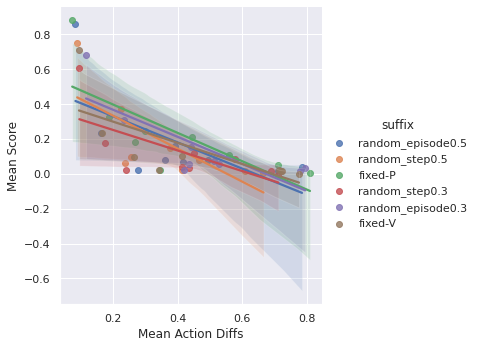

In [129]:
sns.set_theme()
# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=cur_data,
    x="mean_action_diffs", y="mean_score", hue="suffix",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Mean Action Diffs", "Mean Score")

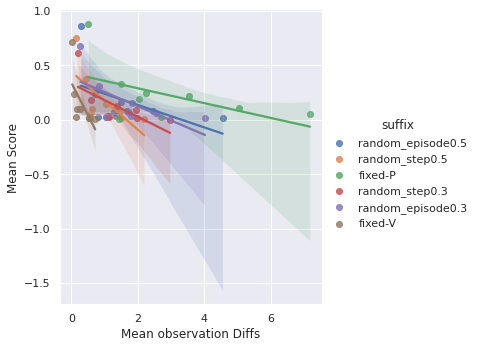

In [130]:
sns.set_theme()
# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=cur_data,
    x="mean_observation_diffs", y="mean_score", hue="suffix",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Mean observation Diffs", "Mean Score")

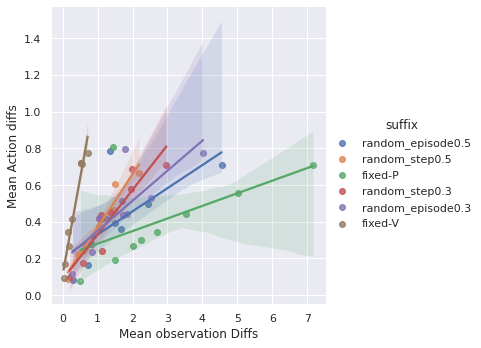

In [131]:
sns.set_theme()
# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=cur_data,
    x="mean_observation_diffs", y="mean_action_diffs", hue="suffix",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Mean observation Diffs", "Mean Action diffs")

# Hist Plot

In [123]:
def plot_result_hist(data, x, y, hue=None, figsize=(10,10), rotation=False):
    #cur_data = data.loc[(data["Domain"] == domain_name)&(data["Task"] == task_name)]

    # Draw a nested barplot by species and sex
    plt.figure(figsize=figsize)
    sns.set_theme(style="whitegrid", font_scale=2)
    g = sns.catplot(
        data=data, kind="bar",
        x=x, y=y, hue=hue,
         palette="Paired", alpha=1, height=6, ci=60, 
    )
    #g.fig.set_size_inches(16,16)
    g.fig.set_size_inches(figsize)
    g.despine(left=True)
    #g.set_axis_labels(x, y)
    #g.legend.set_title(domain_name)
    #g.xticks(rotation=45)
    g.set(xlabel=x, ylabel=y)
    
    #g._legend.remove()
    #g.figure.savefig("final_results_{}_{}.svg".format(task_name, metric_name),format="svg", dpi = 400)
    #g.despine(left=True)
    #g.set_axis_labels("", "Regret@3")
    #g.legend.set_title("")
    if rotation:
        g.set_xticklabels(g.axes.flat[0].get_xticklabels(),rotation = rotation)
    #g.set_xticklabels(g.axes.flat[0].get_xticklabels(),rotation = 45)

<Figure size 1440x360 with 0 Axes>

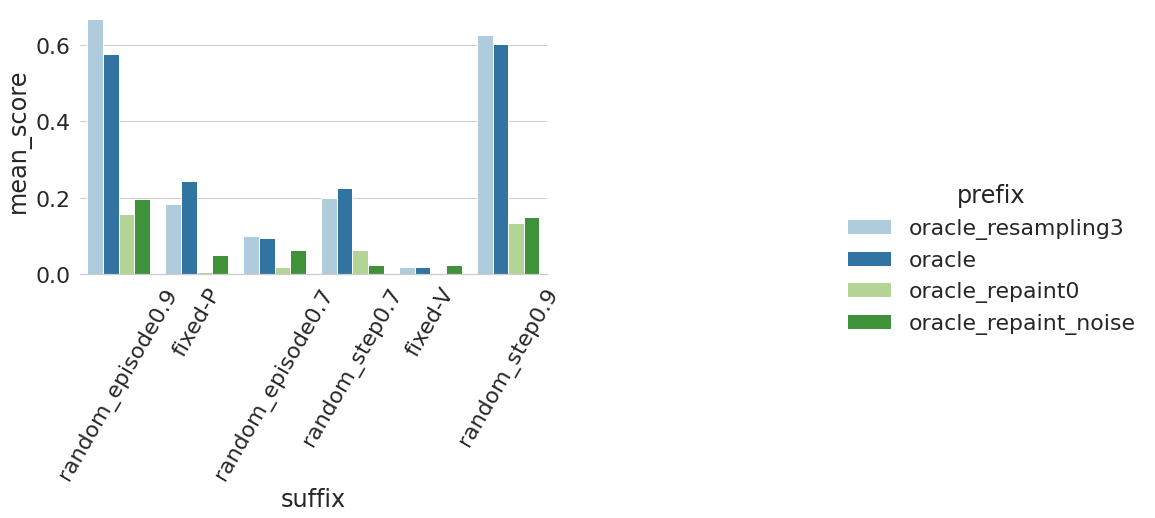

In [124]:
"""
cur_data = select_data(data,{
    "suffix": [
        'fixed-P', 
        'fixed-V', 
        'random_step0.9',
        'random_episode0.9',
    ],
    "prefix": [
        'oracle',
        'oracle_resampling3',
        'oracle_repaint0',
        'oracle_repaint_noise',
        'oracle_add_noise_01',
        'oracle_add_noise_03',
    ],
    
})
"""
cur_data = select_data(data,{
    "suffix": [
        'fixed-P', 
        'fixed-V', 
        'random_step0.9',
        'random_episode0.9',
        'random_step0.7',
        'random_episode0.7',
    ],
    "prefix": [
        'oracle',
        'oracle_resampling3',
        'oracle_repaint0',
        'oracle_repaint_noise',
    ],
    
})

plot_result_hist(cur_data, 'suffix','mean_score','prefix',figsize=(20,5), rotation=60)

<Figure size 1440x360 with 0 Axes>

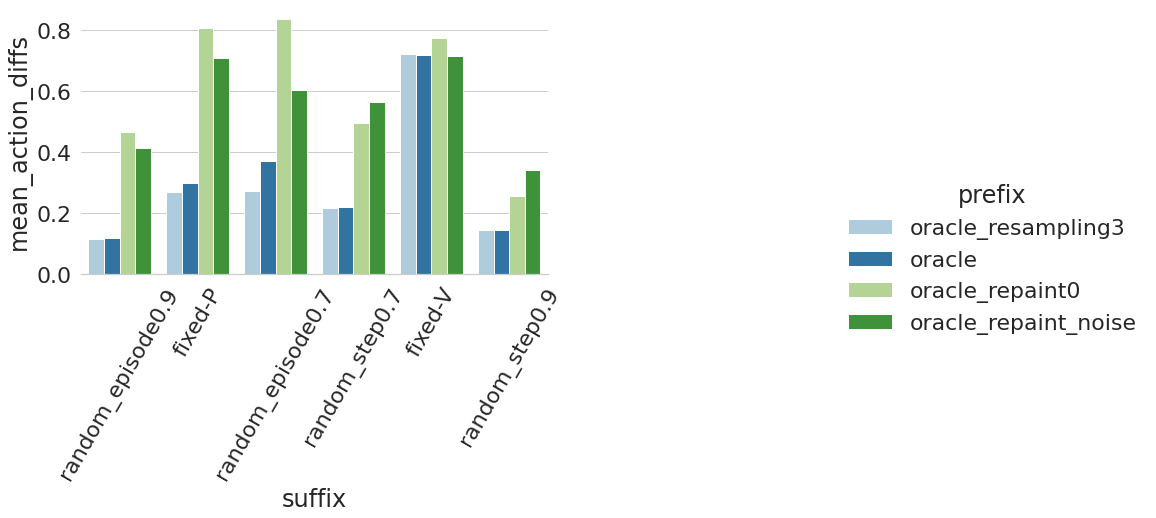

In [125]:

cur_data = select_data(data,{
    "suffix": [
        'fixed-P', 
        'fixed-V', 
        'random_step0.9',
        'random_episode0.9',
        'random_step0.7',
        'random_episode0.7',
    ],
    "prefix": [
        'oracle',
        'oracle_resampling3',
        'oracle_repaint0',
        'oracle_repaint_noise',
    ],
    
})

plot_result_hist(cur_data, 'suffix','mean_action_diffs','prefix',figsize=(20,5), rotation=60)

<Figure size 1440x360 with 0 Axes>

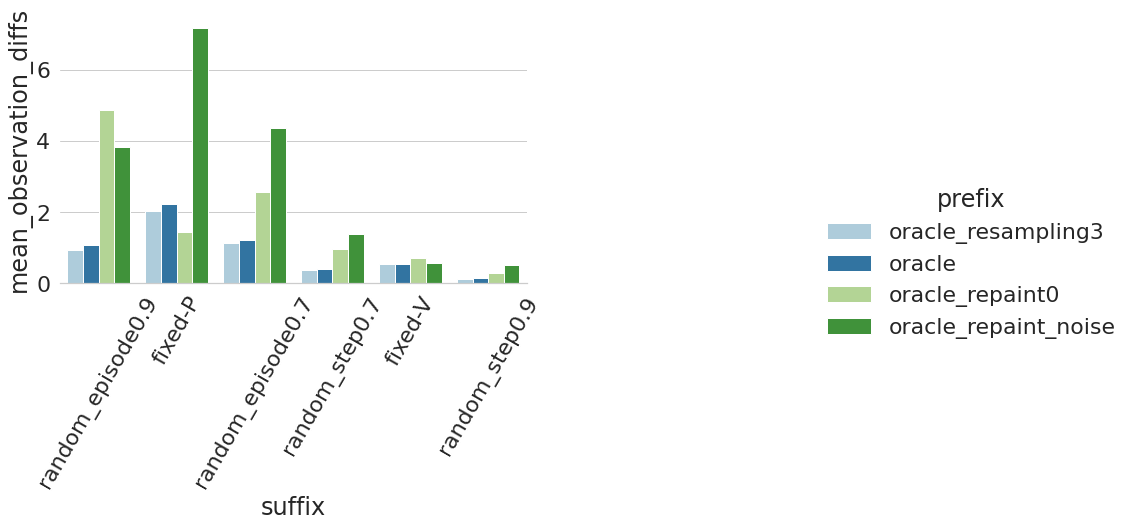

In [126]:

cur_data = select_data(data,{
    "suffix": [
        'fixed-P', 
        'fixed-V', 
        'random_step0.9',
        'random_episode0.9',
        'random_step0.7',
        'random_episode0.7',
    ],
    "prefix": [
        'oracle',
        'oracle_resampling3',
        'oracle_repaint0',
        'oracle_repaint_noise',
    ],
    
})
plot_result_hist(cur_data, 'suffix','mean_observation_diffs','prefix',figsize=(20,5), rotation=60)

<Figure size 1440x360 with 0 Axes>

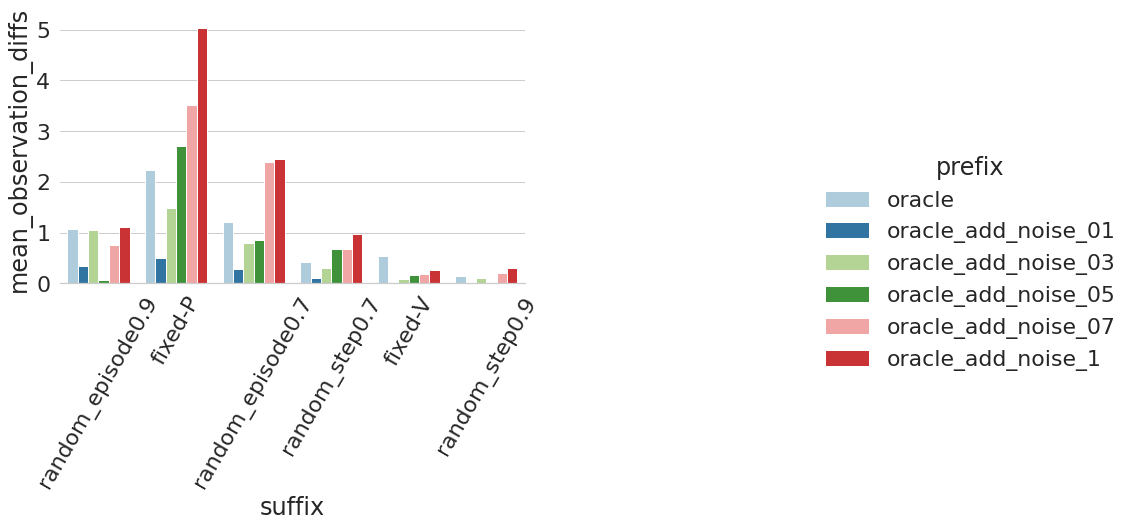

In [152]:
conditions1 = {
    "suffix": [
        'fixed-P', 
        'fixed-V', 
        'random_step0.9',
        'random_episode0.9',
        'random_step0.7',
        'random_episode0.7',
    ],
    "prefix": [
        'oracle',
        'oracle_add_noise_01',
        'oracle_add_noise_03',
        'oracle_add_noise_05',
        'oracle_add_noise_07',
        'oracle_add_noise_09',
        'oracle_add_noise_1',
    ],
    
}
cur_data = select_data(data, conditions1)
cur_data = order_data(cur_data, 'prefix', conditions1["prefix"])
plot_result_hist(cur_data, 'suffix','mean_observation_diffs','prefix',figsize=(20,5), rotation=60)

<Figure size 1440x360 with 0 Axes>

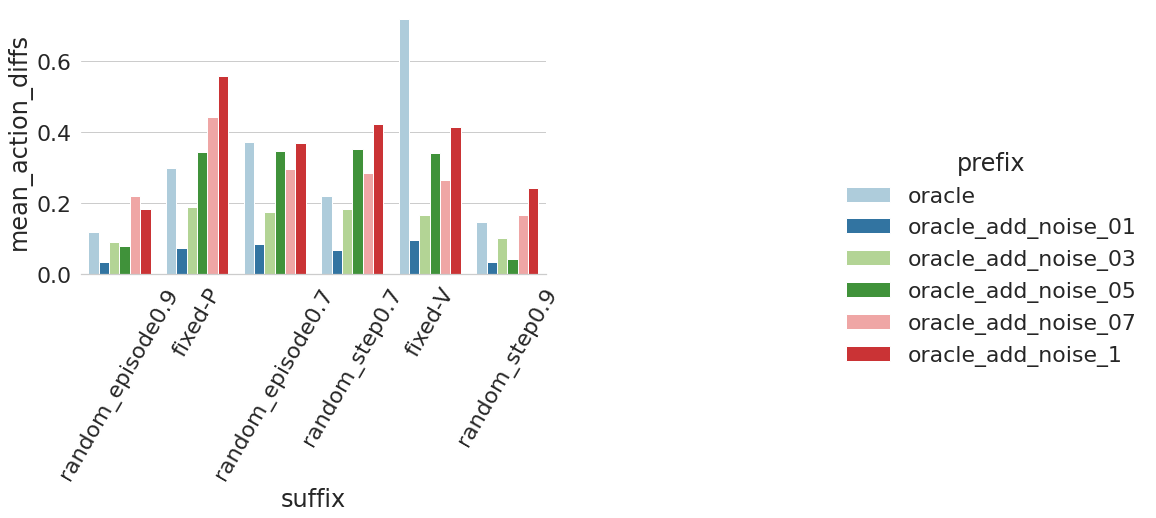

In [153]:
plot_result_hist(cur_data, 'suffix','mean_action_diffs','prefix',figsize=(20,5), rotation=60)

<Figure size 1440x360 with 0 Axes>

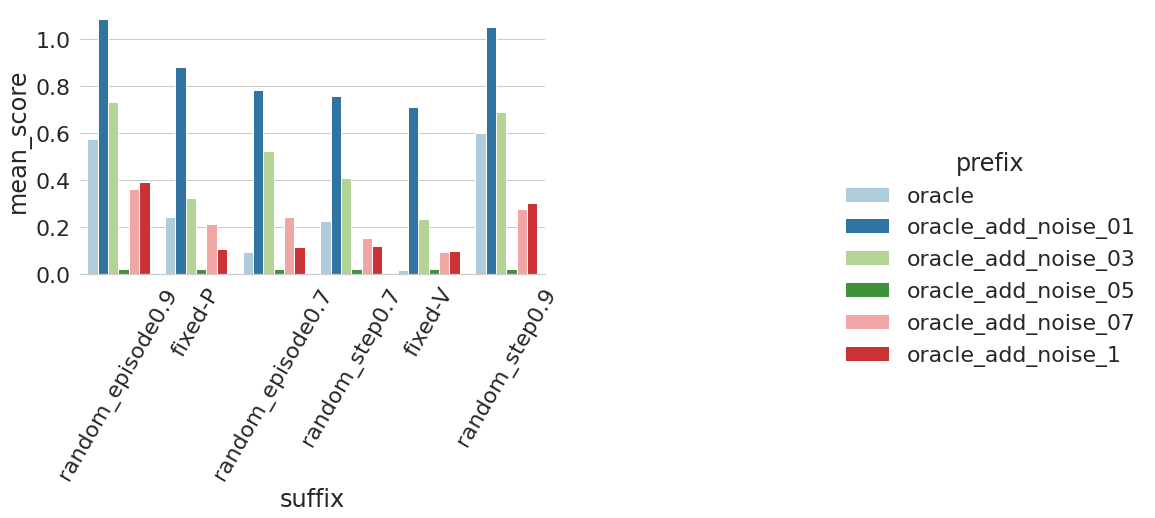

In [155]:
plot_result_hist(cur_data, 'suffix','mean_score','prefix',figsize=(20,5), rotation=60)


In [150]:
cur_data

,env,dataset,prefix,observable_type,observable_ratio,suffix,mean_score,mean_reward,mean_action_diffs,mean_observation_diffs
65,halfcheetah,halfcheetah-medium-expert-v2,oracle,random_step,0.1,random_step0.1,0.025761,39.648548,0.703367,2.247519
66,halfcheetah,halfcheetah-medium-expert-v2,oracle,random_episode,0.9,random_episode0.9,0.574676,6854.526886,0.119572,1.074320
67,halfcheetah,halfcheetah-medium-expert-v2,oracle,full,0.9,full,1.149834,13995.218535,0.000000,0.000000
68,halfcheetah,halfcheetah-medium-expert-v2,oracle,random_episode,0.5,random_episode0.5,0.081900,736.627595,0.360908,1.677378
69,halfcheetah,halfcheetah-medium-expert-v2,oracle,random_step,0.5,random_step0.5,0.096383,916.430640,0.256874,0.626771
...,...,...,...,...,...,...,...,...,...,...
8,halfcheetah,halfcheetah-medium-expert-v2,oracle_add_noise_1,random_step,0.7,random_step0.7,0.119026,1197.550101,0.424364,0.964706
9,halfcheetah,halfcheetah-medium-expert-v2,oracle_add_noise_1,random_episode,0.3,random_episode0.3,0.056986,427.308386,0.528128,2.535377
10,halfcheetah,halfcheetah-medium-expert-v2,oracle_add_noise_1,random_episode,0.1,random_episode0.1,0.045008,278.602526,0.576972,2.807086
11,halfcheetah,halfcheetah-medium-expert-v2,oracle_add_noise_1,fixed,0.8,fixed-V,0.099979,961.076839,0.414892,0.266357
